# Data Cleaning
* Introduction
* Train Data
* Test Data
* Visualization
* Saving Cleaned Data


### Introduction

The data was provided as part of a Kaggle competition __[Toxic Comment Classification dataset on Kaggle](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge#description)__ and is consituted of Wikipedia comments manually labelled as:

- toxic
- severe_toxic
- obscene
- threat
- insult 
- identity_hate

The Raw-Data subfolder inside the data folder contains the following files:

- train.csv - the training set, contains comments with their binary labels
- X_test.csv - the test set, predicts toxicity probabilities for these comments.
- Y_test.csv - labels for the test data (value of -1 indicates it was not used for scoring)


In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
#starting data and ending data folders
in_folder='data/1-raw_data'
out_folder='data/2-cleaned_data'

## Train Data

In [4]:
train = pd.read_csv(in_folder+'/train.csv')
print('The training set has',train.shape[0], 'rows and',train.shape[1],'columns.')
train.head()

The training set has 159571 rows and 8 columns.


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
# check that there are no missing values in either training set
print('The dataset has', train.isna().sum().sum(), 'missing values.')

The dataset has 0 missing values.


In [7]:
# check if there are any duplicates
print('The dataset has', train.duplicated().sum(), 'duplicates.')

The dataset has 0 duplicates.


In [8]:
X_train = train['comment_text']
X_train.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

**Creating a column for non-toxic comments**

In [9]:
Y_train=train[train.columns[2:]]


Y_train['temp']=Y_train['toxic']+Y_train['severe_toxic']+Y_train['obscene']+Y_train['insult']+Y_train['identity_hate']
Y_train['neutral']=0
Y_train.neutral[Y_train['temp']==0]=1
Y_train.drop(columns='temp',axis=1, inplace=True);

Y_train.head(10)

C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1
6,1,1,1,0,1,0,0
7,0,0,0,0,0,0,1
8,0,0,0,0,0,0,1
9,0,0,0,0,0,0,1


## Test Data

In [10]:
X_test = pd.read_csv(in_folder+'/X_test.csv')
print('The testing set has',X_test.shape[0], 'rows and',X_test.shape[1],'columns.')
X_test.head(10)

The testing set has 153164 rows and 2 columns.


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [11]:
Y_test = pd.read_csv(in_folder+'/Y_test.csv')

#creating a label for neutral comments 
Y_test['temp']=Y_test['toxic']+Y_test['severe_toxic']+Y_test['obscene']+Y_test['insult']+Y_test['identity_hate'];
Y_test['neutral']=0
Y_test.neutral[Y_test['temp']==0]=1
Y_test.drop(columns='temp',axis=1, inplace=True);

print('The testing set has',Y_test.shape[0], 'rows and',Y_test.shape[1],'columns.')

Y_test.head(10)




The testing set has 153164 rows and 8 columns.


C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1,0
1,0000247867823ef7,-1,-1,-1,-1,-1,-1,0
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1,0
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1,0
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1,0
5,0001ea8717f6de06,0,0,0,0,0,0,1
6,00024115d4cbde0f,-1,-1,-1,-1,-1,-1,0
7,000247e83dcc1211,0,0,0,0,0,0,1
8,00025358d4737918,-1,-1,-1,-1,-1,-1,0
9,00026d1092fe71cc,-1,-1,-1,-1,-1,-1,0


In [12]:
for column in Y_test.columns[2:]:
    print(Y_test[column].value_counts())

-1    89186
 0    63611
 1      367
Name: severe_toxic, dtype: int64
-1    89186
 0    60287
 1     3691
Name: obscene, dtype: int64
-1    89186
 0    63767
 1      211
Name: threat, dtype: int64
-1    89186
 0    60551
 1     3427
Name: insult, dtype: int64
-1    89186
 0    63266
 1      712
Name: identity_hate, dtype: int64
0    95424
1    57740
Name: neutral, dtype: int64


**Out of our 153,164 rows we have 89,186 rows containing data that was not used for scoring in the kaggle competition, we will frop these rows, since the rows labeled -1 contain this label for all feature we can only drop all the rows that contain -1 for one feature, for example toxic.**

In [13]:
Y_test = Y_test[Y_test.toxic!=-1]
Y_test.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral
5,0001ea8717f6de06,0,0,0,0,0,0,1
7,000247e83dcc1211,0,0,0,0,0,0,1
11,0002f87b16116a7f,0,0,0,0,0,0,1
13,0003e1cccfd5a40a,0,0,0,0,0,0,1
14,00059ace3e3e9a53,0,0,0,0,0,0,1


In [14]:
# merge with an inner join
merged = pd.merge(Y_test, X_test, on='id', how='inner')
X_test=merged[merged.columns[-1]]
Y_test=merged[merged.columns[1:-1]]

print('Testing data shape:',X_test.shape,'\nTesting labels shape:',Y_test.shape)


Testing data shape: (63978,) 
Testing labels shape: (63978, 7)


## Vizualization

### Bar Charts

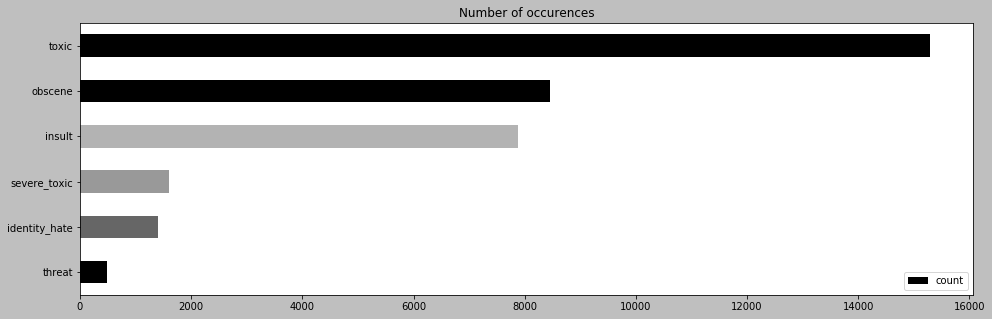

In [25]:
plt.style.use('grayscale')
categories=list(Y_train.columns)
categories.remove('neutral')
occurences = Y_train[categories].sum().to_frame().rename(columns={0: 'count'}).sort_values('count')
occurences.plot.barh(y='count', title='Number of occurences', figsize=(16, 5));

### Correlation Matrix

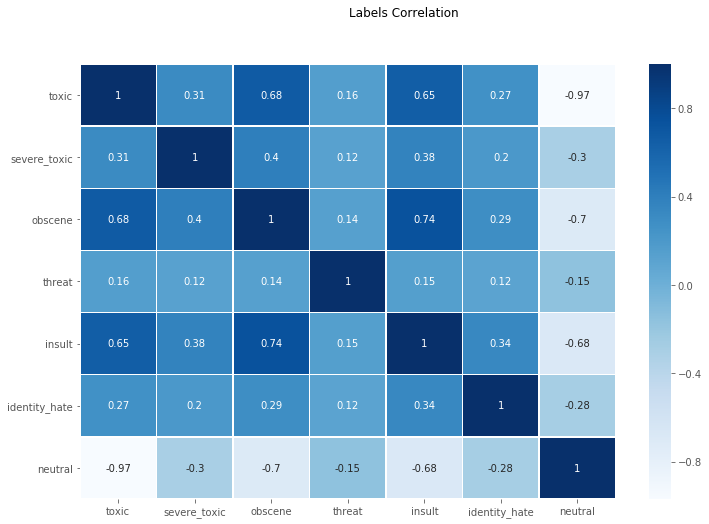

In [26]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Labels Correlation')
sns.heatmap(Y_train[Y_train.columns].corr(), annot=True, cmap="Blues", linewidths=.5, ax=ax);

**How often does a toxic comment fall under more than one category?**

In [70]:
df=Y_train.groupby(list(Y_train.columns))
df=df.size()
df=df.sort_values(ascending=False)
df=df.reset_index()
df=df.rename(columns={0: 'count'})
df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,count
0,0,0,0,0,0,0,1,143346
1,1,0,0,0,0,0,0,5666
2,1,0,1,0,1,0,0,3800
3,1,0,1,0,0,0,0,1758
4,1,0,0,0,1,0,0,1215


## Saving Cleaned Data

In [69]:
pd.DataFrame(X_train).to_csv(out_folder+'/X_train.csv',index=False)
pd.DataFrame(Y_train).to_csv(out_folder+'/Y_train.csv',index=False)
pd.DataFrame(X_test).to_csv(out_folder+'/X_test.csv',index=False)
pd.DataFrame(Y_test).to_csv(out_folder+'/Y_test.csv',index=False)